Name: Sebastiano

Surname: Monti

ID: 2052399

# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.1


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2052399
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labelsT)
print("Frequencies in test set: ", freqsT)

cond = freqs < 10
condT = freqsT < 10
while ((np.any(cond) == True) or (np.any(condT) == True)):
    X = X[permutation]
    y = y[permutation]
    X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
    y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]
    labels, freqs = np.unique(y_train, return_counts=True)
    labelsT, freqsT = np.unique(y_test, return_counts=True)
    cond = freqs < 10
    condT = freqsT < 10

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [67 76 56 54 62 72 51 60 52 50]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [372 389 400 394 401 399 419 381 426 419]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


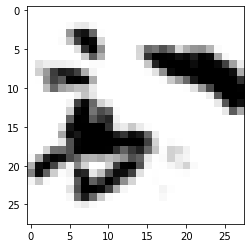

LABEL: 0
INPUT:


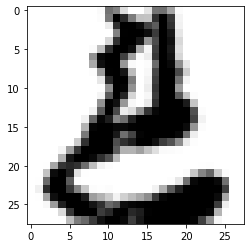

LABEL: 8
INPUT:


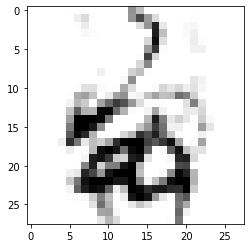

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (20,20,), (40,20,10) ]}

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

clf = GridSearchCV(mlp, parameters, cv=5)
clf.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(clf.best_params_)

print("\nScore with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
print(clf.cv_results_["mean_test_score"])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (40,)}

Score with best parameters:
0.755

All scores on the grid:
[0.67166667 0.74333333 0.755      0.72666667 0.68833333]


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

hls = clf.best_params_['hidden_layer_sizes']
mlp_2 = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1, hidden_layer_sizes=hls)
# recall to use cv=kf to use the k-fold subdivision seen in the lectures
clf_2 = GridSearchCV(mlp_2, parameters, cv = kf)
clf_2.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(clf_2.best_params_)

print("\nScore with best parameters:")
print(clf_2.best_score_)

print("\nAll scores on the grid:")
print(clf_2.cv_results_["mean_test_score"])

bs = clf_2.best_params_['batch_size']

C:\Users\Sebastiano\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastiano\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastiano\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastiano\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastiano\anaconda3\lib\site-packages\skle

RESULTS FOR NN

Best parameters set found:
{'batch_size': 32}

Score with best parameters:
0.7666666666666666

All scores on the grid:
[0.10666667 0.76666667 0.74      ]


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

The scores become better and better with the increasing of the hidden layers and the batch sizes, up to a certain point, beyond which, the score starts to slowly decrease. Also the increasing complexity of the architectures of the layers affects the score decreasing its value for this particular problem. For very small values fo the batch size, the algorithm does not converge, in fact the respective value of the score is very low.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...


C:\Users\Sebastiano\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 0.60 sec

Training MLP of size (20,) ...
Done, training time: 0.65 sec

Training MLP of size (40,) ...
Done, training time: 0.96 sec

Training MLP of size (20, 20) ...
Done, training time: 0.98 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 1.22 sec



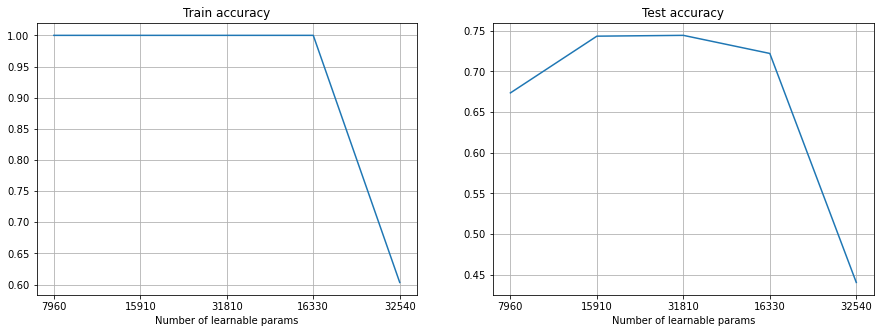

In [10]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1, hidden_layer_sizes=hl_size)
    mlp.fit(X_train, y_train)    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

For the train accuracy we maintain the maximum value up to the point in which the number of learnable parameters becomes too high and we encounter the problem of overfitting.
On the contrary, the maximum that we can obtain from test accuracy, is a bit less than 75% in the best of the cases, in which the numbers of learnable parameters oscillate around 15910 and 31810. For lower numbers of learnable parameters we observe the problem of underfitting, in fact the test accuracy decreases up to around 67,5%. While for higher numbers of learnable parameters we again encounter the problem of overfitting, in fact the test accuracy decreases very rapidly.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

C:\Users\Sebastiano\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastiano\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


RESULTS FOR NN

Best parameters set found:
[0.02 0.2 ]

Score with best parameters:
1.0


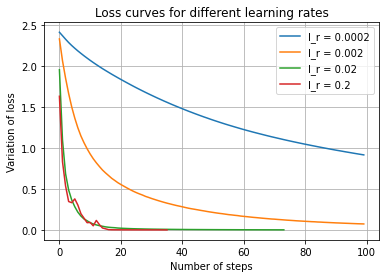

In [11]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = np.array([])


for i in lr_list:
    mlp_3 = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                     tol=1e-4, random_state=ID,
                     hidden_layer_sizes=hls, batch_size=bs, learning_rate_init=i)
    mlp_3.fit(X_train, y_train)
    scores = np.append(scores, np.array([i, mlp_3.score(X_train, y_train)]))
    plt.plot(mlp_3.loss_curve_, label='l_r = '+str(i))
    plt.xlabel('Number of steps')
    plt.ylabel('Variation of loss')
    plt.title('Loss curves for different learning rates')
    plt.legend(loc='best')
    plt.grid(True)
    
scores = np.reshape(scores, (4,2))

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
cond = scores[:, 1] == np.max(scores[:, 1])
lr = scores[cond*scores[:, 0] != 0, 0]
print(lr)

print("\nScore with best parameters:")
print(np.max(scores[:, 1]))

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

For lower learning rates, the loss decreases slowly with the number of steps. On the contrary, for higher values of the learning rate, the loss decreases rapidly and the algorithm stops after few steps, leading to a higher speed of convergence. With the learning rate set to 0,2 we can however observe a less stable behaviour. 

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.255500


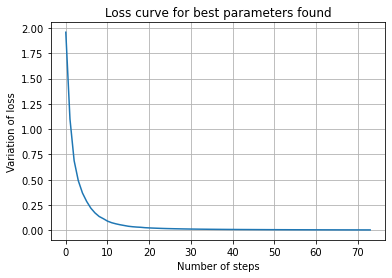

In [12]:
#get training and test error for the best NN model from CV

best_mlp = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd',
                     tol=1e-4, random_state=ID,
                     hidden_layer_sizes=hls, batch_size=bs, learning_rate_init=lr[0])
best_mlp.fit(X_train, y_train)
best_mlp.predict(X_test)
training_error = 1 - best_mlp.score(X_train, y_train)
test_error = 1 - best_mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(best_mlp.loss_curve_)
plt.xlabel('Number of steps')
plt.ylabel('Variation of loss')
plt.title('Loss curve for best parameters found')
plt.grid(True)

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [436 419 381 385 411 377 406 401 403 381]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [14]:
# use best architecture and params from before

best_mlp = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd',
                     tol=1e-4, random_state=ID,
                     hidden_layer_sizes=hls, batch_size=bs, learning_rate_init=lr[0])
best_mlp.fit(X_train, y_train)
best_mlp.predict(X_test)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

training_error = 1 - best_mlp.score(X_train, y_train)
test_error = 1 - best_mlp.score(X_test, y_test)

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


RESULTS FOR NN

NN training error: 0.000000
NN test error: 0.146589


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

With both the numbers of training samples we obtain a training error equal to $0$. On the contrary, for the test error we obtain two different values. For $N_{tr\_samples} = 600$, $err_{test} = 0,26$, while for $N_{tr\_samples} = 4000$, $err_{test} = 0,15$. Thus we observe a significant increase of the precision of the algorithm with an higher number of training samples.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


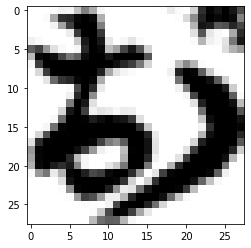

LABEL: 0
Sample number:  3
Correctly classified label from m = 4000:  0
Wrongly classified label from m=600:  4


In [15]:
m = 600
large_m = 4000

best_mlp = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd',
                     tol=1e-4, random_state=ID,
                     hidden_layer_sizes=hls, batch_size=bs, learning_rate_init=lr[0])
best_mlp.fit(X[:m], y[:m])
NN_prediction = best_mlp.predict(X[large_m:])
best_mlp_large = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd',
                     tol=1e-4, random_state=ID,
                     hidden_layer_sizes=hls, batch_size=bs, learning_rate_init=lr[0])
best_mlp_large.fit(X[:large_m], y[:large_m])
large_NN_prediction = best_mlp_large.predict(X[large_m:])

NN_MC = NN_prediction != y[large_m:]
large_NN_CC = large_NN_prediction == y[large_m:]
intersection = NN_MC * large_NN_CC
index = np.where(intersection == True)

plot_input(X[large_m:], y[large_m:], index[0][0])
print("Sample number: ", index[0][0])
print("Correctly classified label from m = 4000: ", large_NN_prediction[index[0][0]])
print("Wrongly classified label from m=600: ", NN_prediction[index[0][0]])

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


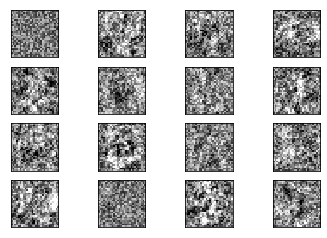

Weights with 4000 data points:


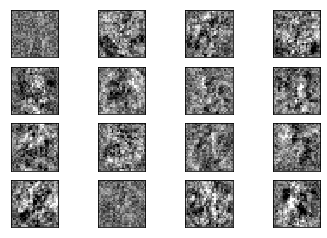

In [16]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp.coefs_[0].min(), best_mlp.coefs_[0].max()
for coef, ax in zip(best_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

The samples are feature-mapped in order to simplify the classification in labels by the neural network algorithm

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [17]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

best_SVM = SVC(kernel = "rbf", C=10, gamma = 0.01) 
best_SVM.fit(X_train, y_train)
best_SVM.predict(X_test)

print ('RESULTS FOR SVM')

SVM_training_error =  1 - best_SVM.score(X_train, y_train)

print("Training error SVM:")
print(SVM_training_error)

SVM_test_error = 1 - best_SVM.score(X_test, y_test)
print("Test error SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training error SVM:
0.0
Test error SVM:
0.08120000000000005


In [18]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C=1)
regL2.fit(X_train, y_train)

# you can re-use your code from Lab 2

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error =  1 - regL2.score(X_train, y_train)
test_error =  1 - regL2.score(X_test, y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.033000
Test error (reg): 0.238200


C:\Users\Sebastiano\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
mlp = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd',
                     tol=1e-4, random_state=ID,
                     hidden_layer_sizes=hls, batch_size=bs, learning_rate_init=lr[0])
mlp.fit(X_train, y_train)
mlp.predict(X_test)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

training_error = 1 - mlp.score(X_train, y_train)
test_error = 1 - mlp.score(X_test, y_test)

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


RESULTS FOR NN

NN training error: 0.000000
NN test error: 0.135000


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

Here i resume the main best results obtained with the three methods and $m_{train} = 5000$.

Neural network: $err_{train} = 0$ ; $err_{test} = 0,14$;

Standard vector machine: $err_{train} = 0$ ; $err_{test} = 0,08$;

Logistic regression: $err_{train} = 0,03$ ; $err_{test} = 0,24$;

We can thus observe that the best performances both on the training and the test sets are obtained using the SVM method, with only $8\%$ of misclassified samples. These results are immediately followed by the neural network technique, that shows a slightly higher test error. While with logistic regression we obtain a more less precise result in which about $24\%$ of the test samples are misclassified.